<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Salary_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## prediction model for salary hike

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Import data set

In [ ]:
salary= pd.read_csv('/content/Salary_Data (1).csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Correlation

In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
salary[salary.duplicated(keep=False)]


,YearsExperience,Salary


Checking data distribution

<ipython-input-7-071909e552a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'], color='b')


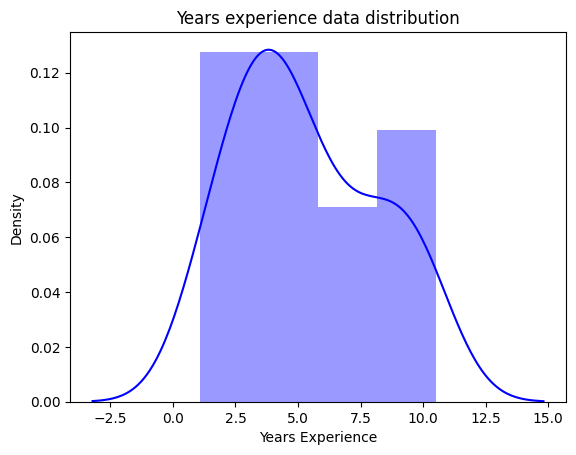

In [ ]:
sns.distplot(salary['YearsExperience'], color='b')
plt.title ('Years experience data distribution')
plt.xlabel('Years Experience')
plt.ylabel('Density')
plt.show()

<ipython-input-8-c89a23661f42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'], color='b')


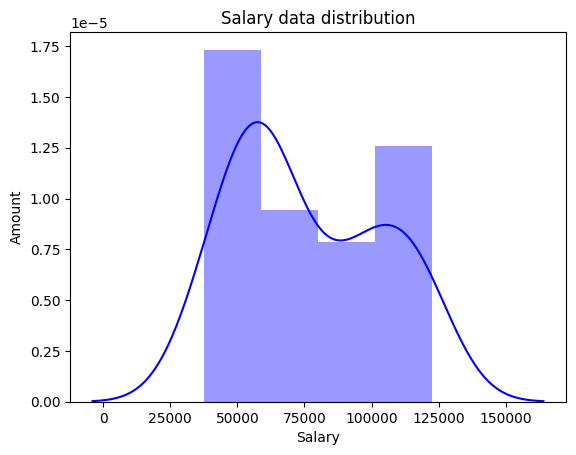

In [ ]:
sns.distplot(salary['Salary'], color='b')
plt.title ('Salary data distribution')
plt.xlabel('Salary')
plt.ylabel('Amount')
plt.show()

<Axes: xlabel='Salary', ylabel='Count'>

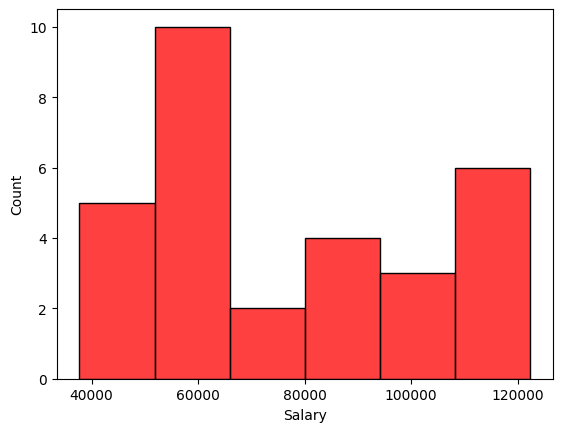

In [ ]:
sns.histplot(salary['Salary'], color='r')

<Axes: xlabel='YearsExperience', ylabel='Count'>

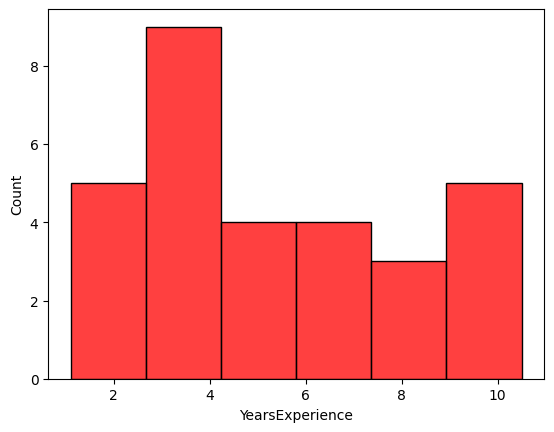

In [ ]:
sns.histplot(salary['YearsExperience'], color='r')

<Axes: ylabel='Salary'>

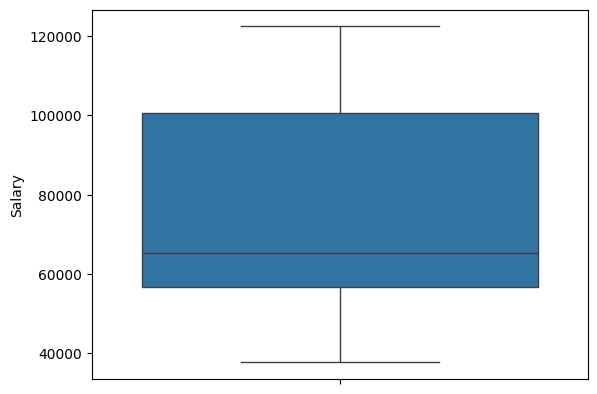

In [ ]:
sns.boxplot(salary['Salary'])

Creat the scatter plot

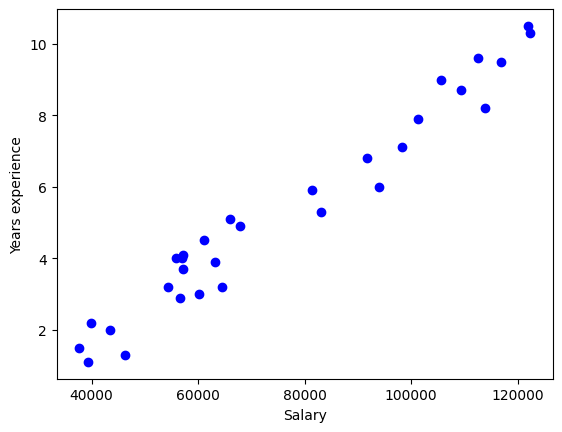

In [ ]:
plt.plot(salary.Salary, salary.YearsExperience, 'bo')
plt.xlabel('Salary')
plt.ylabel('Years experience')
plt.show()

<Axes: xlabel='Salary', ylabel='YearsExperience'>

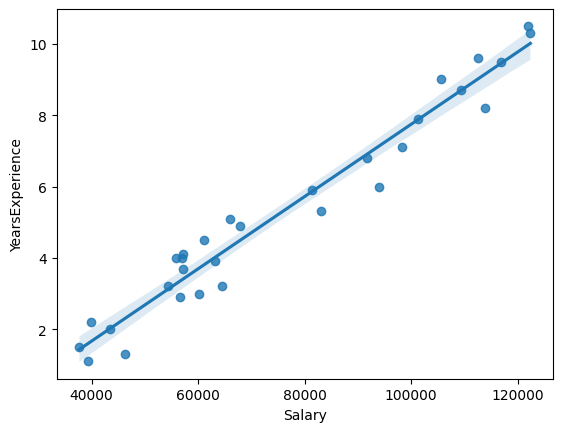

In [ ]:
sns.regplot(x='Salary', y='YearsExperience', data= salary)

In [ ]:
salary.Salary.corr(salary.YearsExperience)

0.9782416184887598

# Model 1 for prediction

In [ ]:
model=smf.ols('Salary~YearsExperience', data=salary).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        13:08:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [ ]:
pred= model.predict(salary.iloc[:,0])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [ ]:
rmse= np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred))**2))
rmse

5592.043608760662

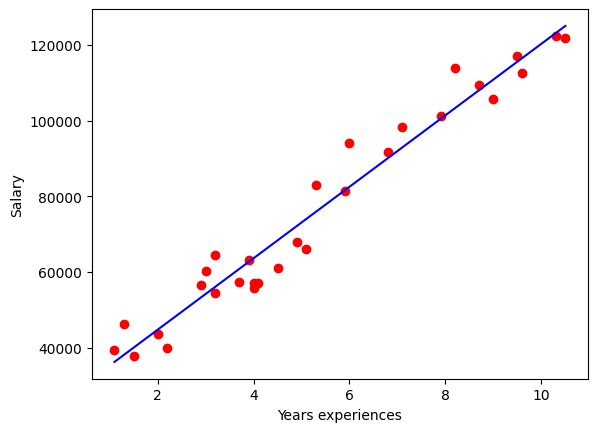

In [ ]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'], color='red')
plt.plot(salary['YearsExperience'],pred, color='blue')
plt.xlabel('Years experiences')
plt.ylabel('Salary')
plt.show()

Model 2 for prediction

In [ ]:
model2= smf.ols('Salary~np.log(YearsExperience)', data=salary).fit()
model2.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           3.25e-13
Time:                        13:08:57   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2=model2.predict(pd.DataFrame(salary['YearsExperience']))
pred2
rmse_log= np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred2))**2))
rmse_log

10302.893706228306

In [ ]:
pred2.corr(salary.Salary)

0.924061081788264

Text(0, 0.5, 'Salary')

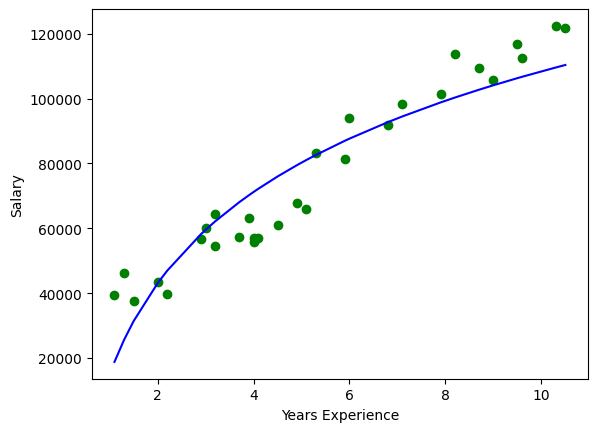

In [ ]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'], color='green')
plt.plot(salary['YearsExperience'],pred2,color='blue')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

## Model 3 for prediction

In [ ]:
model3=smf.ols('np.log(Salary)~YearsExperience',data=salary).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           7.03e-18
Time:                        13:08:57   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_log=model3.predict(pd.DataFrame(salary['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [ ]:
prediction4=np.exp(pred_log)
prediction4

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [ ]:
rmse4= np.sqrt(np.mean((np.array(salary['Salary'])-np.array(prediction4))**2))
rmse4

7213.235076620168

In [ ]:
prediction4.corr(salary.Salary)

0.9660469705377086

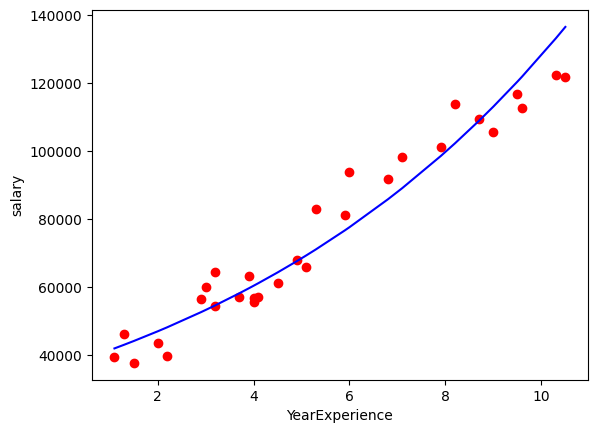

In [ ]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'], color='red')
plt.plot(salary.YearsExperience,prediction4,color='blue')
plt.xlabel('YearExperience')
plt.ylabel('salary')
plt.show()

In [ ]:
resid3= model3.resid_pearson
resid3

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Standardized Residual')

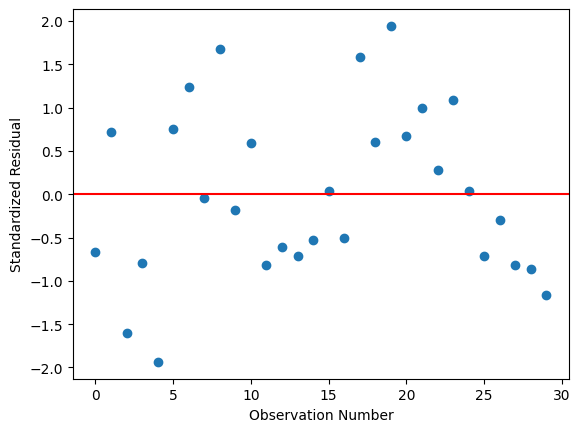

In [ ]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0, color='red')
plt.xlabel('Observation Number')
plt.ylabel('Standardized Residual')

Text(0, 0.5, 'Actual')

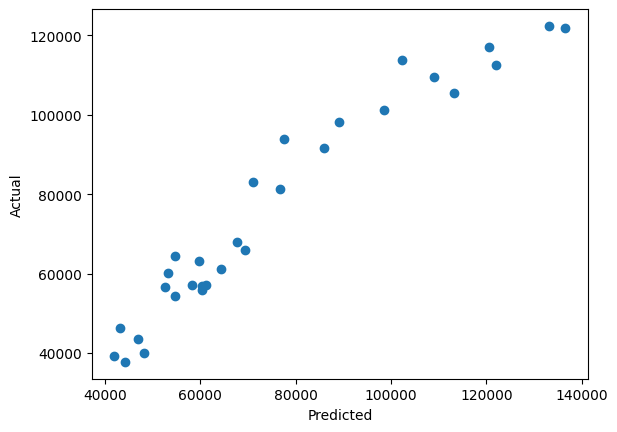

In [ ]:
plt.scatter(x=prediction4, y=salary.Salary)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Compare all models for checking which one is better


In [ ]:
data= {'MODEL': pd.Series(['rmse','rmse_log','rmse4']),
       'RMSE VALUES':pd.Series([rmse,rmse_log,rmse4]),
       'Rsquared':pd.Series([model.rsquared, model2.rsquared,model3.rsquared])}
table= pd.DataFrame(data)
table

,MODEL,RMSE VALUES,Rsquared
0,rmse,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse4,7213.235077,0.931967


Here we can see that the model 1 is better than the all other models

Checking the models ones again

In [ ]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('classic')

In [ ]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

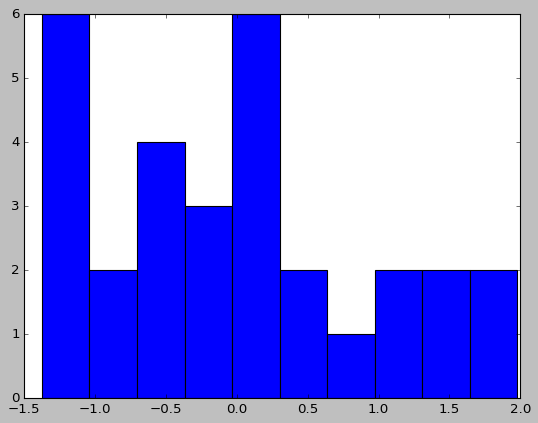

In [ ]:
plt.hist(model.resid_pearson)

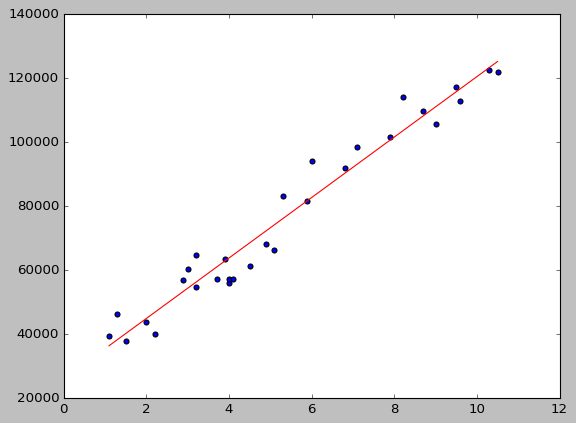

In [ ]:
plt.scatter(salary.YearsExperience,salary.Salary, c='b')
plt.plot(salary.YearsExperience,pred, 'r')

# Conclusion

From all the models, it is evident that the model is higher Rsquared value is model 1 with a value of 0.956

The RMSE value is 5592.0436

thus, the model 1 is the best model to predict salary with a better accuracy becouse it has the highest Rsquared value.